# 머신러닝 개요

## 1. 인공지능, 머신러닝, 딥러닝

### 인공지능

- 컴퓨터가 인간과 같은 지능적인 행동을 할 수 있게 해주는 기법들을 연구하는 분야

### 머신러닝
- 인공지능 연구분야의 방법론 중 하나로 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구 분야(아서 새뮤얼, 1955)
- 데이터를 이용해 컴퓨터가 어떤 지식이나 패턴을 학습(=추론)하는 것
- 지도학습, 비지도학습, 강화학습 등 방법론이 있음
- 패키지:sklearn

### 딥러닝
- 지도학습의 여러 방법론 중 하나.
- 인공신경망을 깊게 여러 층 쌓아 올려 학습하는 방식

- 패키지: tensorflow

# 2. 학습 유형에 따른 알고리즘 분류

#### 지도학습
- 의도하는 결과가 있을 때 사용. --> 종속변수가 존재할 때 사용

- 이미 알려진 사례 바탕으로 일반화된 모델을 만들어 의사 결정 프로세스를 자동화하는 것
- 알고리즘에 입력과 기대되는 출력 제공하고 알고리즘은 주어진 입력에서 원하는 출력을 만드는 방법을 찾는다.
- 분류: 종속변수(Y) -> 라벨, 독립변수(X) -> feature
- 회귀: 종속변수(Y) -> target, 독립변수(X) -> feature

#### 비지도학습
- 훈련데이터에 의도하는 결과(=레이블)가 없을 때 사용
- 입력 데이터를 비슷한 유형의 집합으로 분류

#### 강화학습
- 결정을 내리도록 할 떄 사용
- 결정을 했을 떄의 성공/실패에 따라 주어진 입력값에 대한 

### 알고리즘을 비교해서 최적의 알고리즘을 꺼내야 한다 -> 상황에 따라 좋은? 알고리즘은 다 다르기 때문

# 3. 머신러닝 라이브러리(scikit-learn)

## 패키지 설치

### 파이썬 코드

In [21]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
from hossam import load_data

# Kmeans 코드
from sklearn.cluster import KMeans

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 머신러닝 좌표계산 + 스케일링
from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_dpi = 200

## 데이터 가져오기-게임 유저 군집화

In [23]:
origin = load_data('game_usage')
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


## 데이터 살펴보기
### 1. 게임 이용자의 시간과 레벨 분포 확인

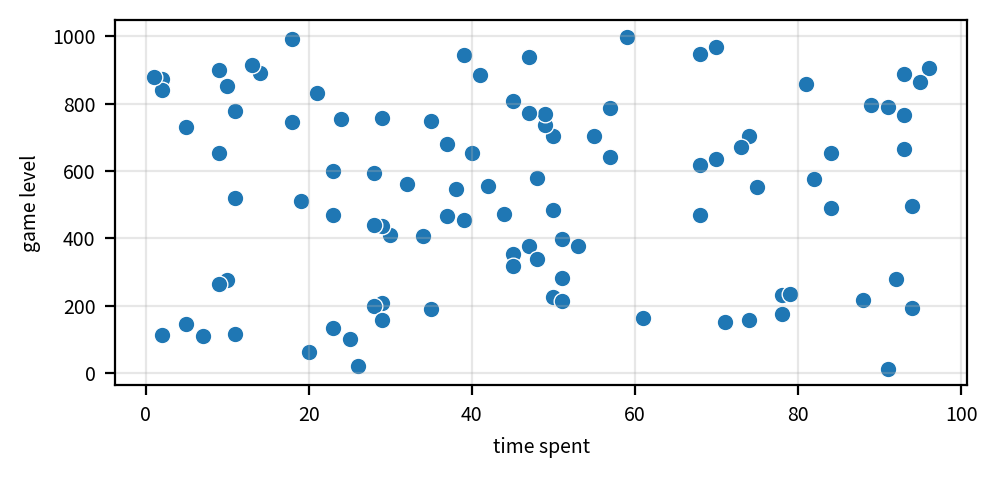

In [24]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data=origin, x = 'time spent', y = 'game level')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()

## 그룹으로 묶어보자
### 1. 머신러닝 학습시키기

In [25]:
# 모델 객체 생성
estimator = KMeans(n_clusters = 4)

# 모델을 학습시킴
estimator.fit(origin)

# 예측
cluster_pred = estimator.predict(origin)
cluster_pred

array([3, 1, 1, 3, 0, 1, 2, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 0, 3, 2, 1, 3,
       0, 1, 0, 3, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 1,
       3, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 3, 0, 1, 3, 2, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 3, 2, 0, 0, 3, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 0, 2], dtype=int32)

## 2. 결과를 보기 좋게...

In [26]:
df = origin.copy()
df['그룹번호'] = cluster_pred
df

,time spent,game level,그룹번호
0,39,944,3
1,55,705,1
2,29,757,1
3,59,999,3
4,7,109,0
...,...,...,...
95,47,939,3
96,50,485,2
97,13,916,3
98,79,235,0


## 3. 결과 시각화

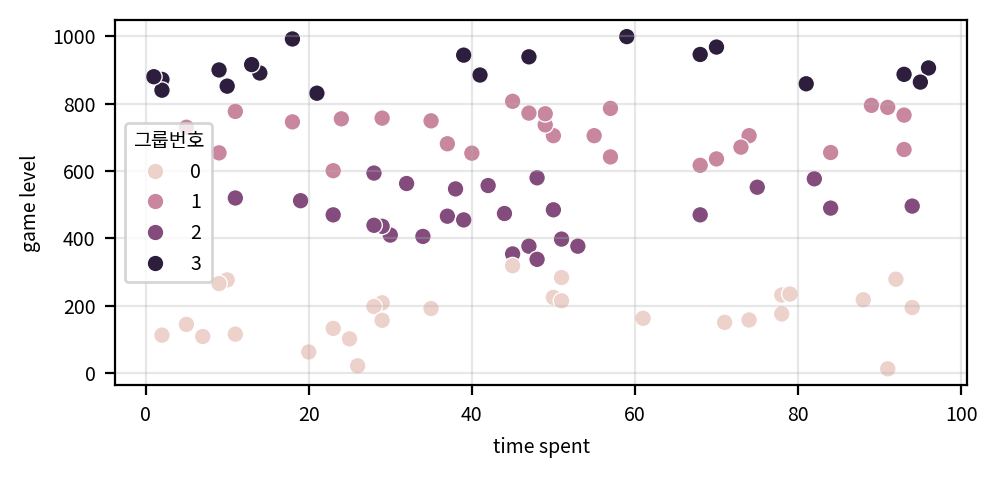

In [27]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data=df, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()

### 3. 결과 시각화(고급단계)

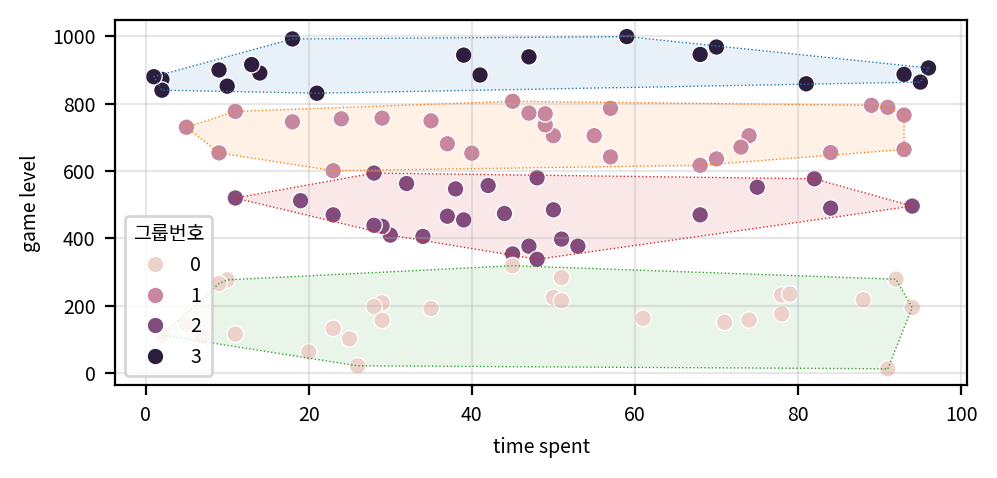

In [28]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in df['그룹번호'].unique():

    df_c = df.loc[df['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번쨰 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=df, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 

# 출력
plt.tight_layout()
plt.show()
plt.close()


## 4. 데이터 표준화 적용
### 1. 표준화 되지 않은 원본 데이터를 x와 y축에 대하여 같은 범위로 설정하고 시각화

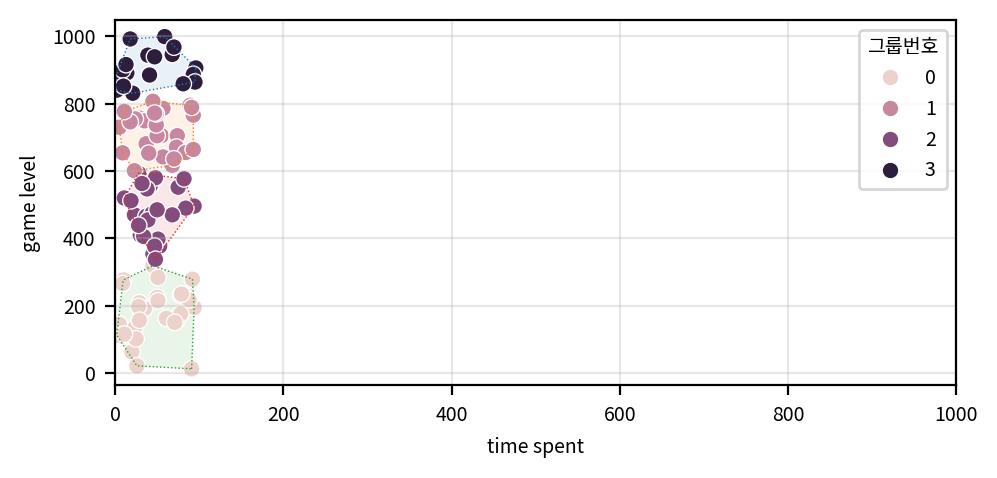

In [29]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in df['그룹번호'].unique():

    df_c = df.loc[df['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번쨰 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=df, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 
ax.set_xlim([0, 1000])
# 출력
plt.tight_layout()
plt.show()
plt.close()


### 2. 데이터 스케일링에 대한 군집화
#### 1. Standard Scaler

In [30]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(origin), columns = origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


In [32]:
# 모델 객체 생성
estimator = KMeans(n_clusters = 4)

# 모델 학습
estimator.fit(sdf)

# 예측
cluster = estimator.predict(sdf)
sdf['그룹번호'] = cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,0
1,0.326494,0.606546,3
2,-0.611500,0.795456,0
3,0.470801,1.674613,2
4,-1.405187,-1.558652,1
...,...,...,...
95,0.037881,1.456640,0
96,0.146111,-0.192688,3
97,-1.188727,1.373084,0
98,1.192335,-1.100909,1


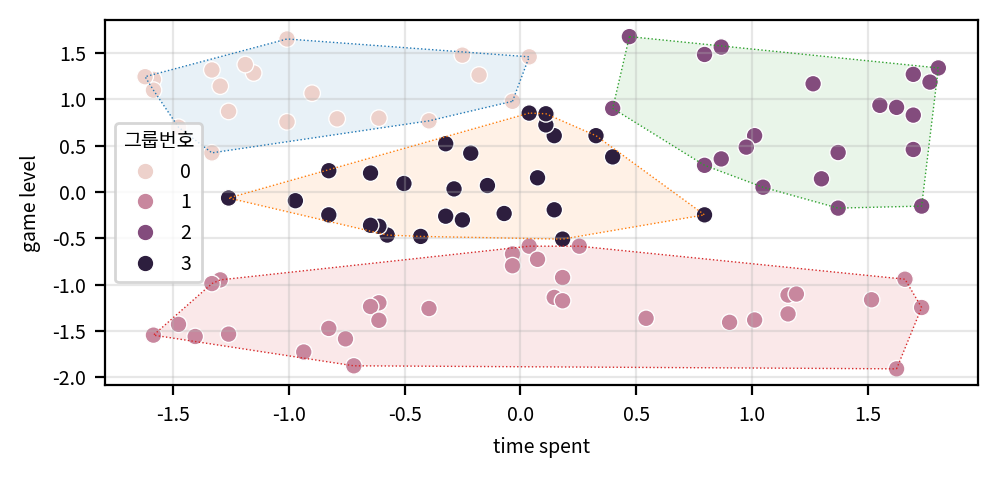

In [35]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in sdf['그룹번호'].unique():

    df_c = sdf.loc[sdf['그룹번호'] == c, ['time spent', 'game level']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번쨰 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=sdf, x = 'time spent', y = 'game level', hue = '그룹번호')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 
# 출력
plt.tight_layout()
plt.show()
plt.close()
